<a href="https://colab.research.google.com/github/ac-26/CSI-25/blob/main/week3_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 2 Assignment -> Take Any dataset of your choice and do the visualization**

### **By -> Arnav Chopra**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.set_option('display.max_columns', None)

In [4]:
url = 'https://raw.githubusercontent.com/ac-26/CSI-25/refs/heads/main/IBM%20HR%20Analytics%20Employee%20Attrition%20Dataset.csv'
df = pd.read_csv(url)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [66]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


# **Starting EDA and Visualisation**

### **Checking for any null values**

In [ ]:
df.isnull().sum()

In [7]:
df.shape

(1470, 35)

### **Analysing our target column**

In [28]:
df['Attrition'].value_counts()
#yes here means how many employees have left work

,count
Attrition,
No,1233
Yes,237


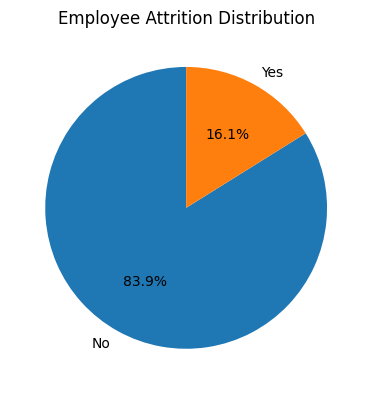

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
attrition_counts = df['Attrition'].value_counts()
plt.pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Employee Attrition Distribution');

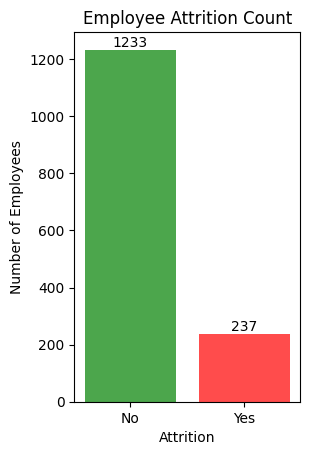

In [63]:
plt.subplot(1, 2, 2)
plt.bar(attrition_counts.index, attrition_counts.values, color=['green', 'red'], alpha=0.7)
plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
for i, v in enumerate(attrition_counts.values):
    plt.text(i, v + 10, str(v), ha='center')
plt.show()

### **I observe that the company has a moderate attrition rate which is typical for many industries and not surprising**

### **Analysing Age column**

In [40]:
df['Age'].describe()
#average age of employees in the company is 36-37

,Age
count,1470.000000
mean,36.923810
std,9.135373
min,18.000000
25%,30.000000
50%,36.000000
75%,43.000000
max,60.000000


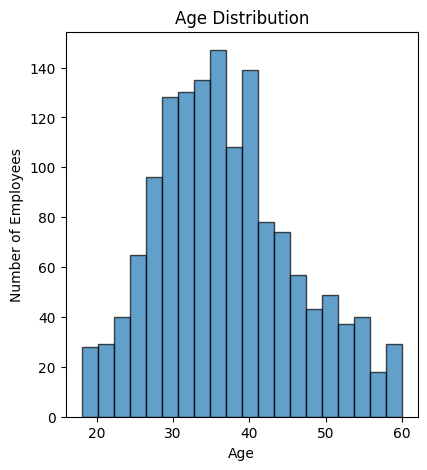

In [54]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Employees');

### **Age vs Attrition**

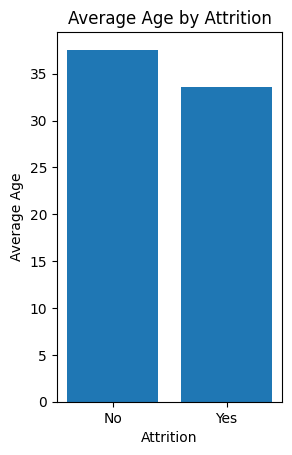

In [55]:
plt.subplot(1, 2, 2)
age_attrition = df.groupby('Attrition')['Age'].mean()
plt.bar(age_attrition.index, age_attrition.values)
plt.title('Average Age by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Age')
plt.show()

In [56]:
print("Average age by attrition:")
print(age_attrition)
#emplyees who stayed were 4 years older on average

Average age by attrition:
Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64


### **Here i observe younger employees(around 33-34 years) are more likely to leave the company compared to older employees (around 37-38 years). This suggests younger employees might be seeking career growth opportunities elsewhere..just an assumption**

### **Analysing Department column**

In [57]:
dept_counts = df['Department'].value_counts()
dept_counts

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


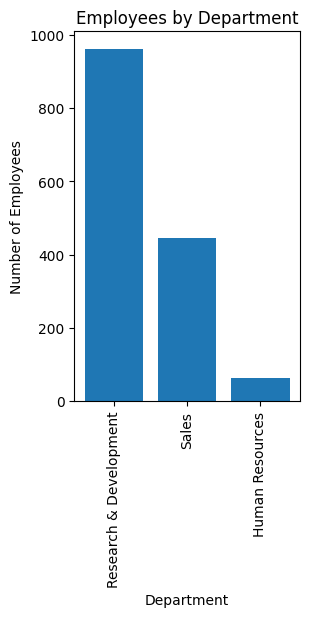

In [58]:
plt.subplot(1, 2, 1)
plt.bar(dept_counts.index, dept_counts.values)
plt.title('Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90);

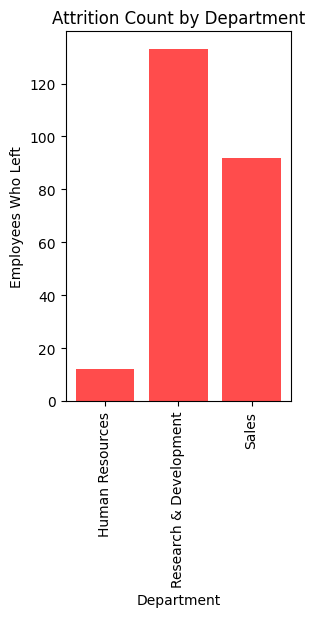

In [59]:
plt.subplot(1, 2, 2)
dept_attrition = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').sum())
plt.bar(dept_attrition.index, dept_attrition.values, color='red', alpha=0.7)
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Employees Who Left')
plt.xticks(rotation=90);

In [60]:
#checking artition rate by depatment
for dept in df['Department'].unique():
    dept_data = df[df['Department'] == dept]
    total = len(dept_data)
    left = len(dept_data[dept_data['Attrition'] == 'Yes'])
    rate = (left/total) * 100
    print(f"{dept}: {left}/{total} = {rate:.1f}%")

Sales: 92/446 = 20.6%
Research & Development: 133/961 = 13.8%
Human Resources: 12/63 = 19.0%


### **Sales has the biggest retention problem, this tells us that sales roles might have higher stress, targets, or better external opportunities.**

### **Analysing MonthlyIncome column**

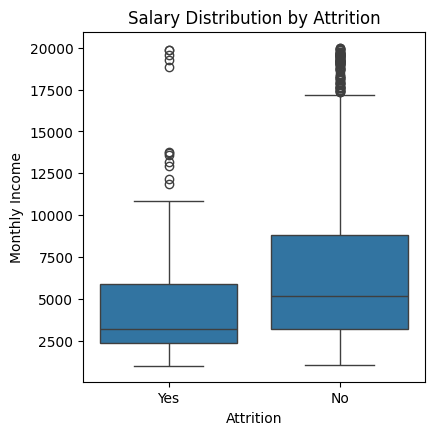

In [70]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Salary Distribution by Attrition')
plt.ylabel('Monthly Income');

### **People whp left were being paid less (median-3000) and people who stayed were being payed more (median-5500)**

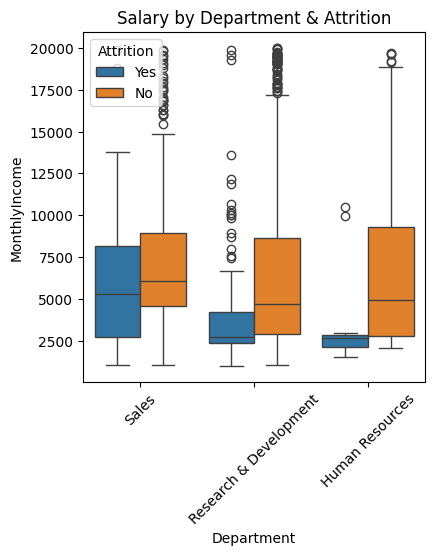

In [73]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Department', y='MonthlyIncome', hue='Attrition')
plt.title('Salary by Department & Attrition')
plt.xticks(rotation=45)
plt.legend(title='Attrition');

### **Here we observe that sales has high attrition but also sales people are paid good..hence we can say that pay alone doesn't predict attrition**

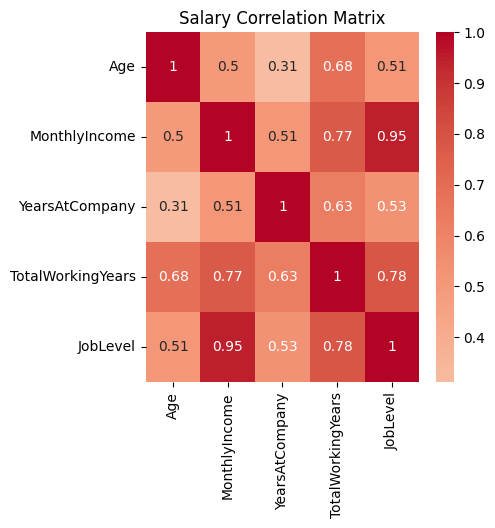

In [76]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 6)
salary_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'JobLevel']
corr_matrix = df[salary_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Salary Correlation Matrix');

### **High correleation between monthly income and job level & job level and total working years...which was kind of expected**

### **Analysing JobSatisfaction column**

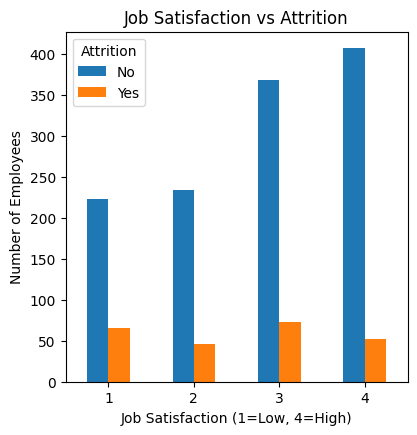

In [16]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
satisfaction_attrition = df.groupby(['JobSatisfaction', 'Attrition']).size().unstack()
satisfaction_attrition.plot(kind='bar', ax=plt.gca())
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Job Satisfaction (1=Low, 4=High)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.xticks(rotation=0);

### **There is a clear inverse relationship between job satisfction and attrition, Employees with low job satisfaction are likely to leave compared to highly satisfied employees.**

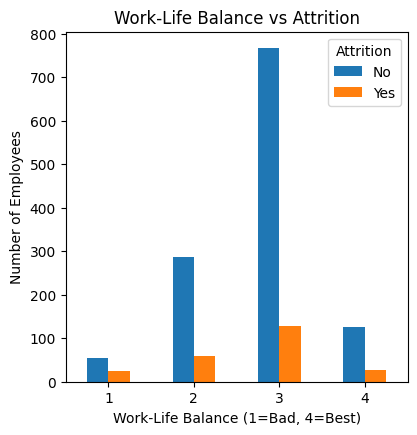

In [19]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
worklife_attrition = df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack()
worklife_attrition.plot(kind='bar', ax=plt.gca())
plt.title('Work-Life Balance vs Attrition')
plt.xlabel('Work-Life Balance (1=Bad, 4=Best)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.xticks(rotation=0);

### **The rate of attrition where work life balance is poor, is higher**

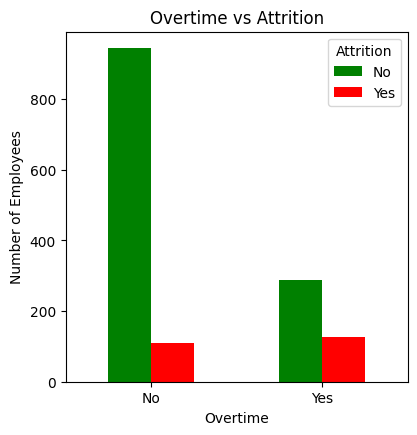

In [21]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 4)
overtime_attrition = df.groupby(['OverTime', 'Attrition']).size().unstack()
overtime_attrition.plot(kind='bar', ax=plt.gca(), color=['green', 'red'])
plt.title('Overtime vs Attrition')
plt.xlabel('Overtime')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.xticks(rotation=0);

### **Employees working overtime are approx 3 times more likely to leave**

/tmp/ipython-input-25-4210499084.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_attrition = df.groupby([distance_bins, 'Attrition']).size().unstack()


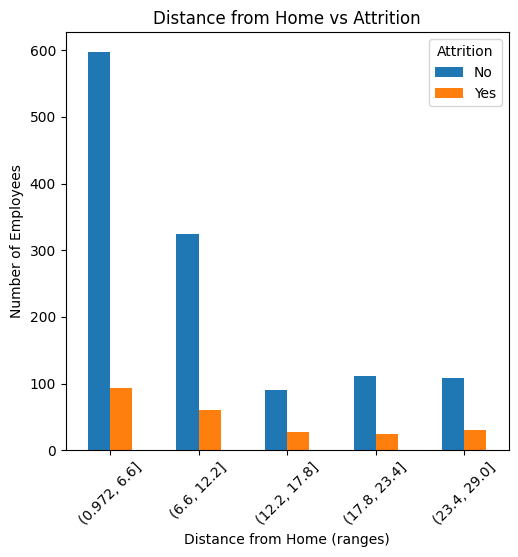

In [25]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 6)
distance_bins = pd.cut(df['DistanceFromHome'], bins=5)
distance_attrition = df.groupby([distance_bins, 'Attrition']).size().unstack()
distance_attrition.plot(kind='bar', ax=plt.gca())
plt.title('Distance from Home vs Attrition')
plt.xlabel('Distance from Home (ranges)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Distance doesnt seem to have much impact on attrition**



------------------



# **My Analysis->**
## **1. Younger employees are more likely to leave the company compared to older employees.**
## **2. Sales has the biggest retention problem.**
## **3. Pay alone doesnt predict attrition**
## **4. Root causes- overtime, poor work-life balance, low satisfaction**